# Project 7: Star Wars Characters
## Data Cleaning (Surveys)

In this project, we will particularly use data cleaning analysis methods to perform data visualization on data from surveys. In this case, we will use Star Wars survey which include rates on Star Wars characters.

Datasets used in this project from:
* [Star Wars Survey](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey) 

We will first import data and rearrange the columns:

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("star_wars.csv",header=None,na_values=['Unfamiliar (N/A)'])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,RespondentID,Have you seen any of the 6 films in the Star W...,Do you consider yourself to be a fan of the St...,Which of the following Star Wars films have yo...,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of pr...,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Ex...,Do you consider yourself to be a fan of the St...,Gender,Age,Household Income,Education,Location (Census Region)
1,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
2,3292879998.0,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
3,3292879538.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
4,3292765271.0,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,NaN,I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


In [3]:
col=['Gender']+list(df.loc[1,15:28])
df=df.loc[2:, [33]+list(np.arange(15,29))]
df.columns=col
df.head()

,Gender,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
2,Male,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,NaN,NaN,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
3,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
6,Male,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


We will start cleaning the data by transforming some values:

In [ ]:
df=df.dropna(subset=['Gender']).dropna(subset=df.columns[1:],how='all')
rate=pd.Series(['Very unfavorably','Somewhat unfavorably','Neither favorably nor unfavorably (neutral)','Somewhat favorably','Very favorably'])
df[col[1:]]=df[col[1:]].applymap(lambda x: np.nan if x is np.nan else rate.index[rate==x][0]).astype(float)
df.head()

In [5]:
import seaborn as sns
sns.heatmap(df.isnull())

We will finally aggregate the data into a more efficient table:

In [6]:
df=df.pivot_table(values=col[1:],columns='Gender',aggfunc=['mean','count'])
df.columns = df.columns.swaplevel(0, 1)
df=df.sort_index(axis=1, level=0,ascending=False)
df

Gender                    Male          Female      
                          mean count      mean count
Anakin Skywalker      2.654731   391  2.892857   364
Boba Fett             2.486559   372  2.176871   294
C-3P0                 3.242718   412  3.578125   384
Darth Vader           2.749392   411  2.197436   390
Emperor Palpatine     2.212291   358  1.874126   286
Han Solo              3.675545   413  3.677922   385
Jar Jar Binks         1.548387   372  2.024615   325
Lando Calrissian      2.653740   361  2.614865   296
Luke Skywalker        3.563549   417  3.612245   392
Obi Wan Kenobi        3.634568   405  3.643411   387
Padme Amidala         2.530612   343  2.687285   291
Princess Leia Organa  3.528846   416  3.590793   391
R2 D2                 3.444444   414  3.712821   390
Yoda                  3.577017   409  3.698210   391

Use the final table to finally visualize rates on Star Wars Characters from total respondents:

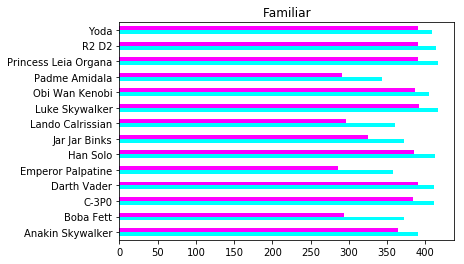

In [7]:
df.loc[:,(slice(None),'count')].plot.barh(cmap='cool',legend=False,title='Familiar')

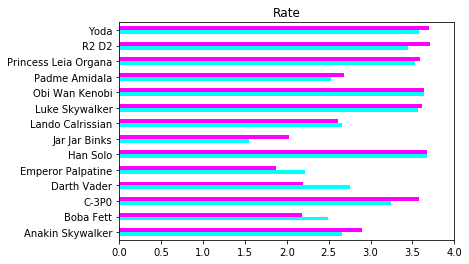

In [8]:
df.loc[:,(slice(None),'mean')].plot.barh(cmap='cool',legend=False,xlim=(0,4),title='Rate')

End. Thankyou!